<a href="https://colab.research.google.com/github/Pxtri2156/Project-machine-learning/blob/master/Fruit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)



Using TensorFlow backend.


In [ ]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200) #Quy định kích thước  
train_path = '/content/drive/My Drive/Data/Fruit/Data_of_Fruit/train_zip/train'

for filename in os.listdir('/content/drive/My Drive/Data/Fruit/Data_of_Fruit/train_zip/train'):
  print(filename)
  if filename.split('.')[1] == 'jpg':

    img = cv2.imread(os.path.join(train_path,filename))
        
    # Spliting file names and storing the labels for image in list
    train_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
        
    train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

banana_27.xml
apple_48.xml
apple_74.jpg
banana_37.jpg
banana_60.xml
apple_68.jpg
apple_10.xml
banana_58.jpg
apple_23.xml
banana_59.jpg
apple_23.jpg
apple_13.xml
apple_73.xml
banana_13.xml
banana_68.jpg
apple_8.jpg
banana_14.xml
banana_47.xml
banana_53.jpg
banana_41.xml
apple_57.xml
banana_32.xml
apple_35.jpg
apple_17.jpg
banana_35.xml
apple_61.jpg
apple_24.jpg
banana_26.jpg
apple_1.xml
banana_4.xml
apple_42.xml
banana_12.jpg
apple_30.xml
apple_2.jpg
banana_1.jpg
banana_17.xml
banana_51.jpg
banana_44.jpg
apple_14.xml
apple_65.xml
apple_21.xml
banana_59.xml
apple_64.xml
apple_43.xml
banana_72.xml
apple_55.jpg
banana_20.xml
apple_5.xml
banana_49.jpg
apple_55.xml
banana_57.jpg
banana_65.jpg
banana_38.xml
apple_5.jpg
apple_46.jpg
apple_47.jpg
banana_47.jpg
banana_63.xml
apple_9.jpg
banana_63.jpg
apple_19.jpg
banana_33.jpg
apple_42.jpg
banana_48.jpg
apple_37.xml
apple_11.jpg
apple_1.jpg
banana_56.xml
banana_58.xml
banana_34.jpg
banana_12.xml
banana_23.xml
banana_21.xml
banana_7.jpg
apple_36.

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(x_train.shape)
print(x_val.shape)

(180, 4)
(60, 4)
(180, 200, 200, 3)
(60, 200, 200, 3)


In [ ]:
print(y_train[0])
print(x_train[0][0][0])

[1 0 0 0]
[255 255 255]


In [ ]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/My Drive/Data/Fruit/Data_of_Fruit/test_zip/test'

for filename in os.listdir(test_path):
  print(filename)
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(test_path,filename))
    #print(img)    
    # Spliting file names and storing the labels for image in list
    test_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
    #print(img) 
    test_images.append(img)
#print(test_images[0])
        
# Converting test_images to array
test_images = np.array(test_images)



apple_77.jpg
apple_77.xml
apple_95.xml
apple_92.jpg
apple_78.jpg
apple_89.jpg
apple_87.xml
apple_83.jpg
apple_82.jpg
apple_86.xml
banana_79.jpg
banana_82.xml
apple_87.jpg
banana_78.jpg
apple_91.jpg
apple_95.jpg
apple_89.xml
banana_83.jpg
apple_85.xml
apple_92.xml
apple_94.xml
apple_93.jpg
apple_84.jpg
apple_80.jpg
banana_79.xml
apple_79.xml
apple_81.xml
apple_84.xml
banana_80.jpg
apple_85.jpg
banana_81.xml
apple_90.jpg
banana_80.xml
apple_93.xml
apple_82.xml
banana_83.xml
apple_86.jpg
apple_88.xml
banana_78.xml
banana_81.jpg
apple_94.jpg
banana_77.xml
apple_83.xml
apple_91.xml
banana_82.jpg
apple_88.jpg
apple_80.xml
apple_81.jpg
apple_90.xml
banana_84.jpg
banana_77.jpg
apple_79.jpg
apple_78.xml
banana_91.jpg
banana_92.jpg
mixed_21.xml
banana_86.jpg
banana_84.xml
mixed_21.jpg
banana_93.xml
orange_79.xml
orange_77.jpg
banana_88.jpg
orange_77.xml
orange_78.jpg
banana_87.jpg
banana_85.xml
mixed_22.jpg
orange_79.jpg
banana_94.xml
banana_85.jpg
banana_86.xml
banana_91.xml
mixed_24.jpg
banana

[1 0 0 0]


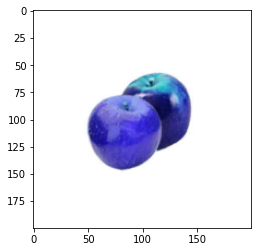

In [ ]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[0 1 0 0]


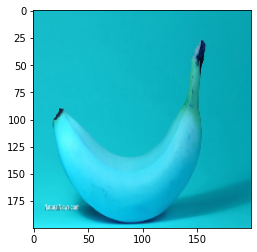

In [ ]:
# Visualizing Training data
print(train_labels[100])
plt.imshow(train_images[100])

In [ ]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=
                 30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

# Hàm mất mát giống hàm cross entropy

In [ ]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 9s 48ms/step - loss: 2.6172 - acc: 0.2889 - val_loss: 5.9600 - val_acc: 0.3667
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 2.7499 - acc: 0.4611 - val_loss: 1.5705 - val_acc: 0.4500
Epoch 3/50
180/180 [==============================] - 0s 3ms/step - loss: 1.3080 - acc: 0.5667 - val_loss: 0.8546 - val_acc: 0.7000
Epoch 4/50
180/180 [==============================] - 1s 3ms/step - loss: 0.8054 - acc: 0.6889 - val_loss: 0.8156 - val_acc: 0.6167
Epoch 5/50
180/180 [==============================] - 1s 3ms/step - loss: 0.7499 - acc: 0.7111 - val_loss: 0.6226 - val_acc: 0.7833
Epoch 6/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6107 - acc: 0.8000 - val_loss: 0.6576 - val_acc: 0.7667
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5571 - acc: 0.7778 - val_loss: 0.6371 - val_acc: 0.7833
Epoch 8/50
180/180 [==========

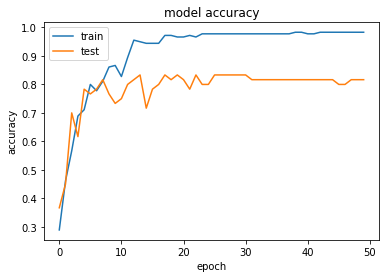

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

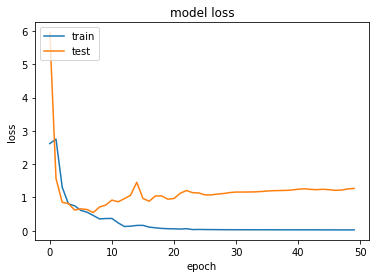

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

60/60 [==============================] - 0s 8ms/step
[1.2702135801315309, 0.8166666626930237]


In [ ]:
# Testing predictions and the actual label
checkImage = test_images[2:3]
checklabel = test_labels[2:3]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

#print(test_images[0:1])
#print(test_labels[0:1])
print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


In [ ]:
Test_images = []
Test_labels = []
shape = (200,200)
Test_path = '/content/drive/My Drive/Data/Fruit/Test_data'

for filename in os.listdir(Test_path):
  print(filename)
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(Test_path,filename))
    #print(img)    
    # Spliting file names and storing the labels for image in list
    #Test_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
    #print(img) 
    Test_images.append(img)
#print(test_images[0])
Test_labels  = [0,0,1,1,1,1,1,1,1,1,1]       
# Converting test_images to array
Test_images = np.array(Test_images)

apple_01 (1).jpg
banana_01.jpg
apple_01.jpg
banana_02.jpg
banana_03.jpg
banana_04.jpg
banana_05.jpg
banana_06.jpg
banana_07.jpg
banana_08.jpg
banana_09.jpg


In [ ]:
Check_image = Test_images[2:3]
Check_label = Test_labels[2:3]

predict = model.predict(np.array(Check_image))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print(predict)
print("Actual :- ",Check_label)
print("Predicted :- ",output[np.argmax(predict)])

[[1.9711511e-02 9.7973287e-01 8.8944532e-09 5.5556954e-04]]
Actual :-  [1]
Predicted :-  banana


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
a = [1,2]
print(a)

[1, 2]
